In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime


from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut


In [3]:
#TODO FILL NAS
df_host = pd.read_csv('host_data.csv')
df_loc = pd.read_csv('location_data.csv')
df_pric = pd.read_csv('pricing_data.csv')
df_prop = pd.read_csv('property_data.csv')
df_rev = pd.read_csv('review_data.csv')

In [4]:
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]
for i in dfs:
    print(i.isna().sum())

customer_id                   0
host_since                  173
host_response_rate        17193
host_has_profile_pic        173
host_identity_verified      173
dtype: int64
customer_id         0
neighbourhood    9550
latitude            0
longitude           0
city                0
zipcode           894
dtype: int64
customer_id            0
log_price              0
cleaning_fee           0
cancellation_policy    0
dtype: int64
customer_id        0
property_type      0
room_type          0
bedrooms          83
bathrooms        182
accommodates       0
beds             113
dtype: int64
customer_id                 0
number_of_reviews           0
review_scores_rating    15733
first_review            14932
last_review             14896
dtype: int64


In [5]:
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]
for i in dfs:
    print(i.shape)
    print(i.head(1))

(69546, 5)
                                         customer_id  host_since  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  10/07/2013   

  host_response_rate host_has_profile_pic host_identity_verified  
0               100%                    t                      t  
(69546, 6)
                                         customer_id     neighbourhood  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  Columbia Heights   

    latitude  longitude city zipcode  
0  38.921768 -77.030985   DC   20009  
(69546, 4)
                                         customer_id  log_price  cleaning_fee  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        4.0         False   

  cancellation_policy  
0            moderate  
(69546, 7)
                                         customer_id property_type  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        house    

        room_type  bedrooms  bathrooms  accommodates  beds  
0   private room        1.0        1.0       

In [6]:
for i, df in enumerate(dfs, start=1):
    num_duplicates = df.duplicated(subset=['customer_id'], keep=False).sum()
    print(f"DataFrame {i}: {num_duplicates} duplicate rows based on 'customer_id'")

DataFrame 1: 2728 duplicate rows based on 'customer_id'
DataFrame 2: 2728 duplicate rows based on 'customer_id'
DataFrame 3: 2728 duplicate rows based on 'customer_id'
DataFrame 4: 2728 duplicate rows based on 'customer_id'
DataFrame 5: 2728 duplicate rows based on 'customer_id'


In [7]:
for i, df in enumerate(dfs, start=1):
    num_duplicates = df.duplicated(keep=False).sum()
    print(f"DataFrame {i}: {num_duplicates} fully identical rows")

DataFrame 1: 2728 fully identical rows
DataFrame 2: 2728 fully identical rows
DataFrame 3: 2728 fully identical rows
DataFrame 4: 2728 fully identical rows
DataFrame 5: 2728 fully identical rows


In [8]:
df_host = df_host.drop_duplicates(keep='first')
df_loc = df_loc.drop_duplicates(keep='first')
df_pric = df_pric.drop_duplicates(keep='first')
df_prop = df_prop.drop_duplicates(keep='first')
df_rev = df_rev.drop_duplicates(keep='first')
dfs = [df_host, df_loc, df_pric, df_prop, df_rev]

In [9]:
for i in dfs:
    print(i.shape)
    print(i.head(1))

(68182, 5)
                                         customer_id  host_since  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  10/07/2013   

  host_response_rate host_has_profile_pic host_identity_verified  
0               100%                    t                      t  
(68182, 6)
                                         customer_id     neighbourhood  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...  Columbia Heights   

    latitude  longitude city zipcode  
0  38.921768 -77.030985   DC   20009  
(68182, 4)
                                         customer_id  log_price  cleaning_fee  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        4.0         False   

  cancellation_policy  
0            moderate  
(68182, 7)
                                         customer_id property_type  \
0  4mUYtiM8BCkYchSi0rELebTJxPM68aZdKyUkER7ol5HI32...        house    

        room_type  bedrooms  bathrooms  accommodates  beds  
0   private room        1.0        1.0       

In [10]:
df = df_host.merge(df_loc, on='customer_id', how='inner') \
                   .merge(df_pric, on='customer_id', how='inner') \
                   .merge(df_rev, on='customer_id', how='inner') \
                   .merge(df_prop, on='customer_id', how='inner')
df['host_since'] = pd.to_datetime(df['host_since'])
df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])

In [11]:
df['review_scores_rating'] = df['review_scores_rating'].fillna(50)

In [12]:
df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
df['host_has_profile_pic'].fillna(df['host_has_profile_pic'].mode()[0], inplace=True)

df.loc[:, 'host_response_rate'] = df['host_response_rate'].astype(str).str.rstrip('%')
df.loc[:, 'host_response_rate'] = pd.to_numeric(df['host_response_rate'], errors='coerce')
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)
df['host_response_rate'].isna().sum()

df['host_since'] = pd.to_datetime(df['host_since'])
df['host_since'] = (pd.to_datetime(datetime.now()) - df['host_since']).dt.days / 365
df['host_since'] = df['host_since'].fillna(df['host_since'].median())

C:\Users\lickm\AppData\Local\Temp\ipykernel_7244\3929864502.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['host_identity_verified'].fillna(df['host_identity_verified'].mode()[0], inplace=True)
C:\Users\lickm\AppData\Local\Temp\ipykernel_7244\3929864502.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting va

In [21]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mode()[0])
df['beds'] = df['beds'].fillna(df['beds'].mode()[0])
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mode()[0])

df['bedrooms'] = df['bedrooms'].replace(-1, 1)

In [22]:
df.isna().sum()

Unnamed: 0                    0
customer_id                   0
host_since                    0
host_response_rate            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood               437
latitude                      0
longitude                     0
city                          0
zipcode                       0
log_price                     0
cleaning_fee                  0
cancellation_policy           0
number_of_reviews             0
review_scores_rating      15409
first_review              14619
last_review               14583
property_type                 0
room_type                     0
bedrooms                      0
bathrooms                     0
accommodates                  0
beds                          0
dtype: int64

In [15]:
#df['host_response_rate'] = pd.to_numeric(df['host_response_rate'].str.rstrip('%'))
#Change host_since to a numeric value ( we calculate the duration)
#df['host_since'] = ((pd.to_datetime(datetime.now()) - df['host_since']).dt.days) / 365
#Change t/f to True and False
df['host_has_profile_pic'] = df['host_has_profile_pic'].map({'t': True, 'f': False}).astype(bool)
df['host_identity_verified'] = df['host_identity_verified'].map({'t': True, 'f': False}).astype(bool)
#Capatalize values in room_type and property_type to have a uniform standard between values
df['room_type'] = df['room_type'].str.upper()
df['property_type'] = df['property_type'].str.upper()

In [16]:
filled_loc_data = 'loc_data_filled.csv'
geolocator = Nominatim(user_agent="lazaniaa7@gmail.com")
        
def get_zipcode(lat, lon):
    try:
        location = geolocator.reverse((lat, lon), exactly_one=True, timeout=10)
        if location and 'postcode' in location.raw['address']:
            return location.raw['address']['postcode']
    except GeocoderTimedOut:
        return None
    return None


if os.path.exists(filled_loc_data):
    df = pd.read_csv(filled_loc_data)
else:
    for idx, row in df[df['zipcode'].isna()].iterrows():
        if pd.notna(row['latitude']) and pd.notna(row['longitude']):
            zipcode = get_zipcode(row['latitude'], row['longitude'])
            df.at[idx, 'zipcode'] = zipcode

In [17]:
for i in df['zipcode'][df['neighbourhood'].isna()]:
        try:
            df.loc[(df_loc['zipcode'] == i) & (df['neighbourhood'].isna()), 'neighbourhood'] = df['neighbourhood'][df['zipcode'] == i].mode()[0]
        except:
            #NNF = NO NEIGHBOURHOOD FOUND
            df.loc[(df_loc['zipcode'] == i) & (df['neighbourhood'].isna()), 'neighbourhood'] = 'NNF'


df.to_csv(filled_loc_data)

In [18]:
print(df.shape)
print(df.duplicated().sum())

(68182, 24)
0


In [19]:
df.isna().sum()

Unnamed: 0                    0
customer_id                   0
host_since                    0
host_response_rate            0
host_has_profile_pic          0
host_identity_verified        0
neighbourhood               437
latitude                      0
longitude                     0
city                          0
zipcode                       0
log_price                     0
cleaning_fee                  0
cancellation_policy           0
number_of_reviews             0
review_scores_rating      15409
first_review              14619
last_review               14583
property_type                 0
room_type                     0
bedrooms                     80
bathrooms                   177
accommodates                  0
beds                        112
dtype: int64

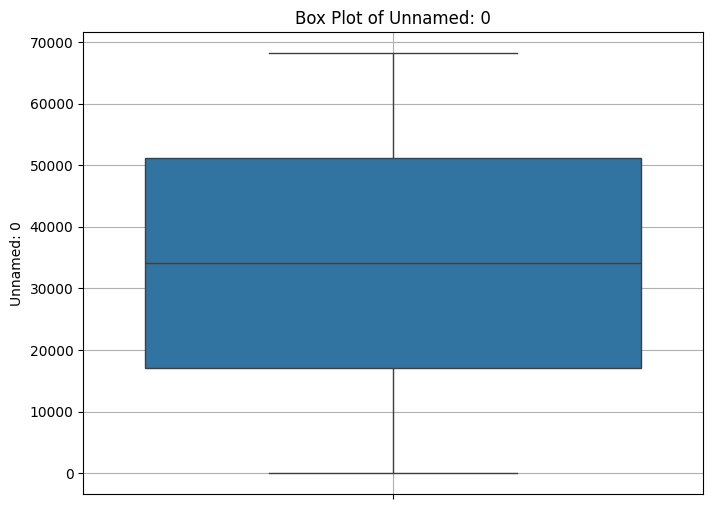

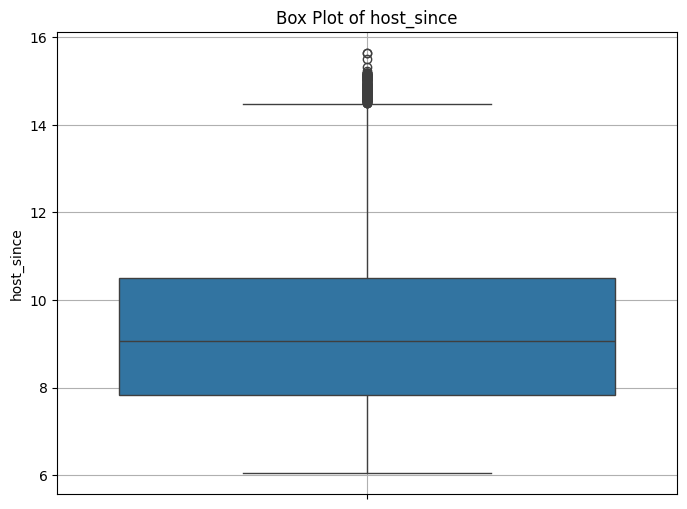

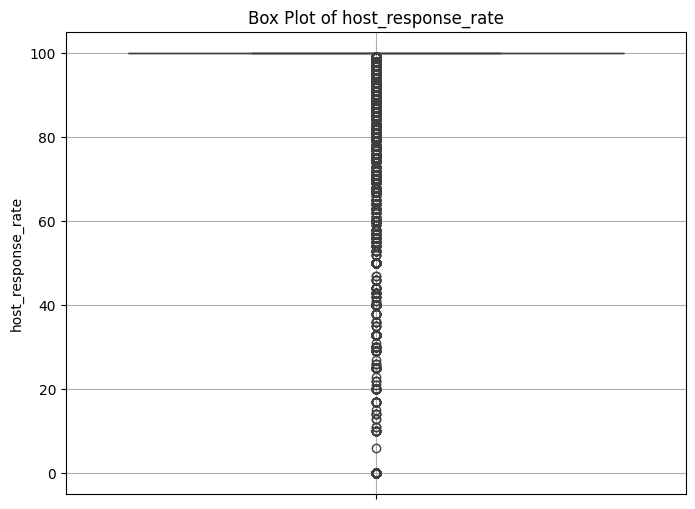

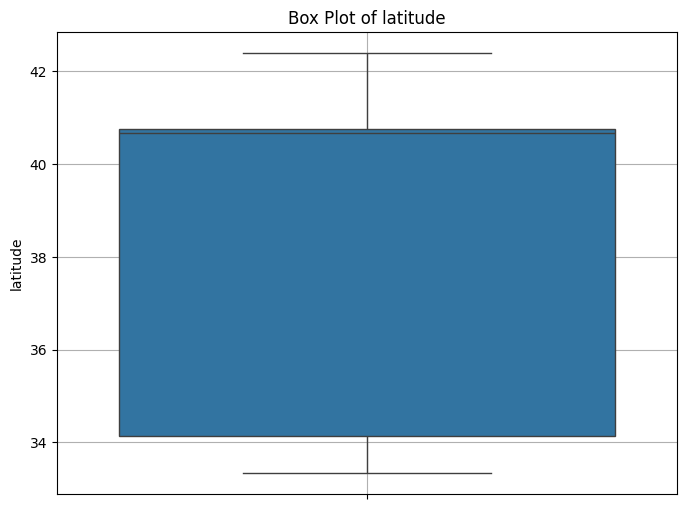

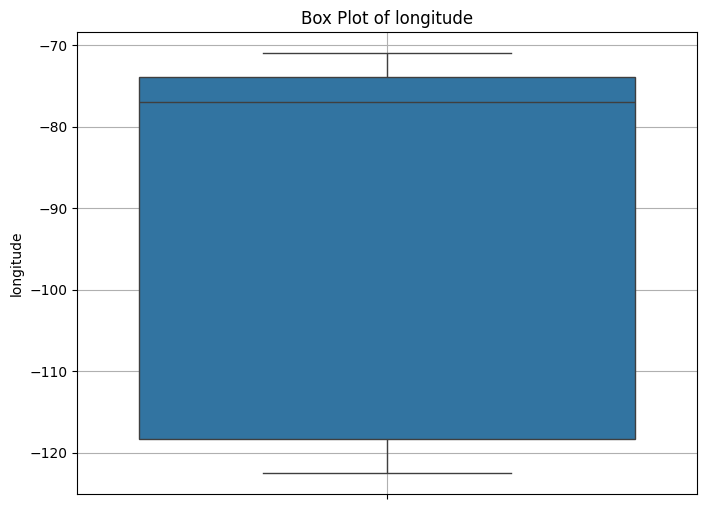

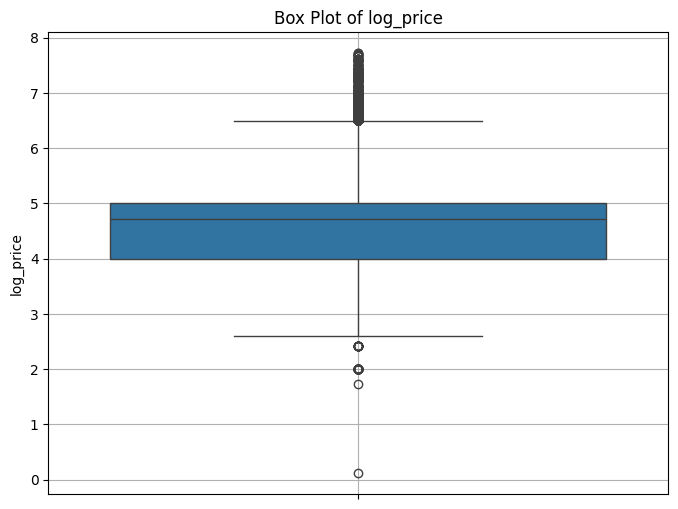

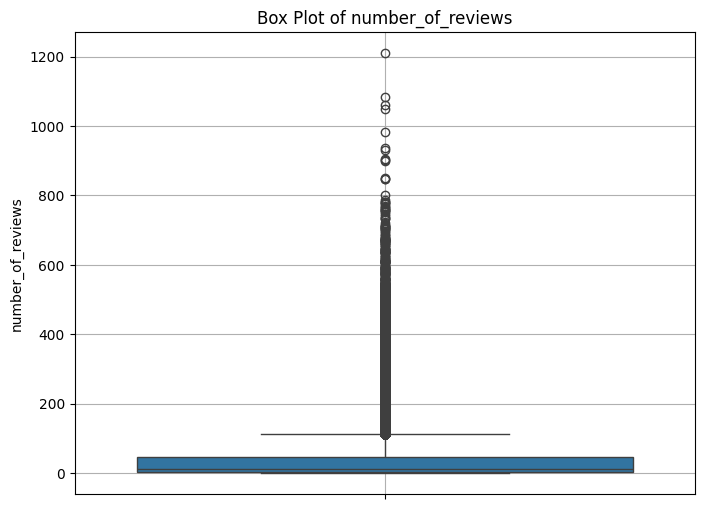

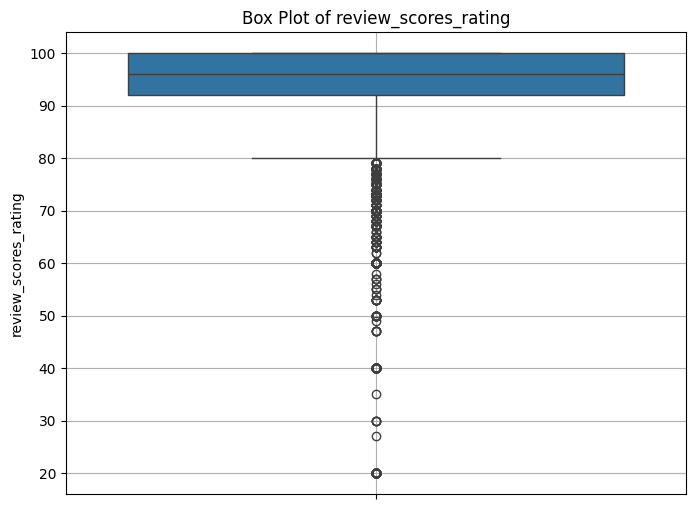

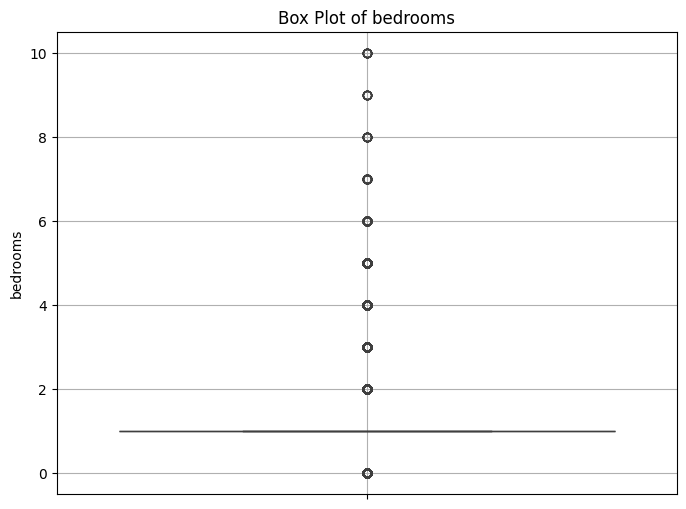

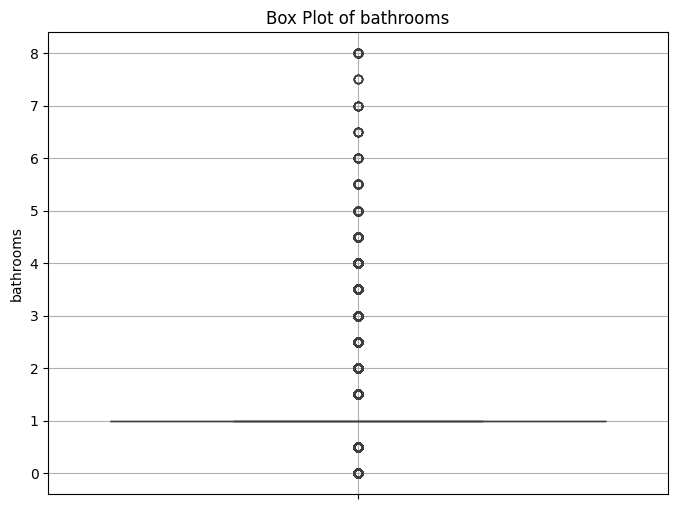

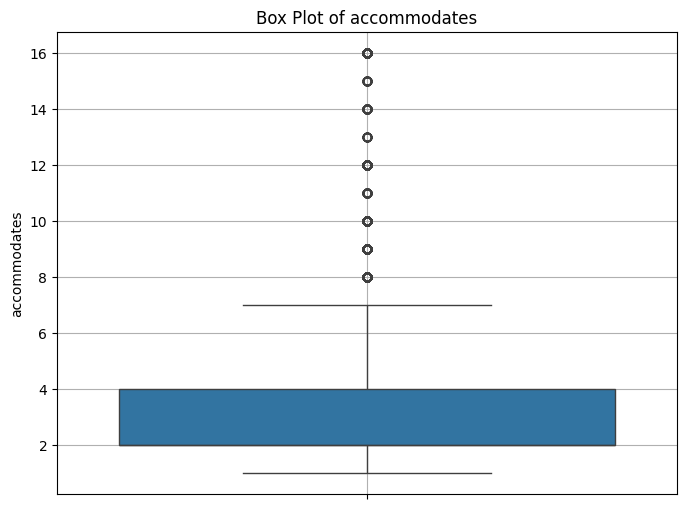

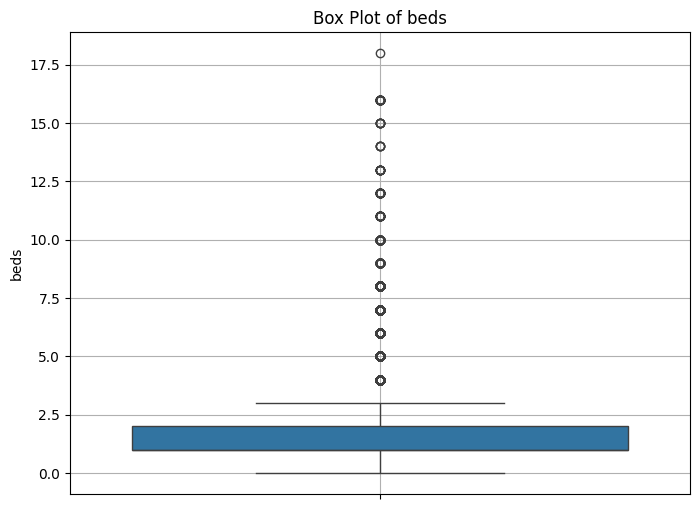

In [20]:
numerical_cols = df.select_dtypes(include=['number']).columns


for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, y=col) 
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

In [1]:
df.corr()

NameError: name 'df' is not defined

In [ ]:
model_scores = {}
X = df_with_dummies.drop(columns=['log_price'])
y = df_with_dummies['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
saved_model_name = 'model_lr_TUNED.joblib'

param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

if os.path.exists(saved_model_name):
    loaded_model = joblib.load(saved_model_name)
    model_lr_TUNED = loaded_model
else:
    grid_search = GridSearchCV(LinearRegression(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    model_lr_TUNED = grid_search.best_estimator_
    joblib.dump(model_lr_TUNED, saved_model_name)

y_pred = model_lr_TUNED.predict(X_test)

train_score = model_lr_TUNED.score(X_train, y_train)
test_score = model_lr_TUNED.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

params = model_lr_TUNED.get_params()

model_scores['Linear Regression TUNED'] = {
    'Train Score': train_score,
    'Test Score': test_score,
    'Used Parameters': params
}

print(f"Train Score (R²): {train_score}")
print(f"Test Score (R²): {test_score}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


In [ ]:
saved_model_name_ridge = 'model_ridge_TUNED.joblib'
saved_model_name_lasso = 'model_lasso_TUNED.joblib'

param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False]
}

# Ridge Regression
if os.path.exists(saved_model_name_ridge):
    model_ridge_TUNED = joblib.load(saved_model_name_ridge)
else:
    grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5)
    grid_search_ridge.fit(X_train, y_train)
    model_ridge_TUNED = grid_search_ridge.best_estimator_
    joblib.dump(model_ridge_TUNED, saved_model_name_ridge)

y_pred_ridge = model_ridge_TUNED.predict(X_test)

train_score_ridge = model_ridge_TUNED.score(X_train, y_train)
test_score_ridge = model_ridge_TUNED.score(X_test, y_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

params_ridge = model_ridge_TUNED.get_params()

model_scores['Ridge Regression TUNED'] = {
    'Train Score': train_score_ridge,
    'Test Score': test_score_ridge,
    'Mean Squared Error': mse_ridge,
    'R2 Score': r2_ridge,
    'Used Parameters': params_ridge
}

print(f"Ridge Regression - Train Score (R²): {train_score_ridge}")
print(f"Ridge Regression - Test Score (R²): {test_score_ridge}")
print(f"Ridge Regression - Mean Squared Error: {mse_ridge}")
print(f"Ridge Regression - R² Score: {r2_ridge}")

# Lasso Regression
if os.path.exists(saved_model_name_lasso):
    model_lasso_TUNED = joblib.load(saved_model_name_lasso)
else:
    grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5)
    grid_search_lasso.fit(X_train, y_train)
    model_lasso_TUNED = grid_search_lasso.best_estimator_
    joblib.dump(model_lasso_TUNED, saved_model_name_lasso)

y_pred_lasso = model_lasso_TUNED.predict(X_test)

train_score_lasso = model_lasso_TUNED.score(X_train, y_train)
test_score_lasso = model_lasso_TUNED.score(X_test, y_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

params_lasso = model_lasso_TUNED.get_params()

model_scores['Lasso Regression TUNED'] = {
    'Train Score': train_score_lasso,
    'Test Score': test_score_lasso,
    'Used Parameters': params_lasso
}

print(f"Lasso Regression - Train Score (R²): {train_score_lasso}")
print(f"Lasso Regression - Test Score (R²): {test_score_lasso}")
print(f"Lasso Regression - Mean Squared Error: {mse_lasso}")
print(f"Lasso Regression - R² Score: {r2_lasso}")

In [ ]:
saved_model_name_elastic = 'model_elastic_TUNED.joblib'

param_grid_elastic = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9],
    'fit_intercept': [True, False]
}

# Elastic Net Regression
if os.path.exists(saved_model_name_elastic):
    model_elastic_TUNED = joblib.load(saved_model_name_elastic)
else:
    grid_search_elastic = GridSearchCV(ElasticNet(), param_grid_elastic, cv=5)
    grid_search_elastic.fit(X_train, y_train)
    model_elastic_TUNED = grid_search_elastic.best_estimator_
    joblib.dump(model_elastic_TUNED, saved_model_name_elastic)

y_pred_elastic = model_elastic_TUNED.predict(X_test)

train_score_elastic = model_elastic_TUNED.score(X_train, y_train)
test_score_elastic = model_elastic_TUNED.score(X_test, y_test)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)
r2_elastic = r2_score(y_test, y_pred_elastic)

params_elastic = model_elastic_TUNED.get_params()
alpha_used = params_elastic['alpha']
l1_ratio_used = params_elastic['l1_ratio']

model_scores['Elastic Net Regression TUNED'] = {
    'Train Score': train_score_elastic,
    'Test Score': test_score_elastic,
    'Mean Squared Error': mse_elastic,
    'R² Score': r2_elastic,
    'Lambda (Alpha)': alpha_used,
    'L1 Ratio': l1_ratio_used,
    'Used Parameters': params_elastic
}

print(f"Elastic Net Regression - Train Score (R²): {train_score_elastic}")
print(f"Elastic Net Regression - Test Score (R²): {test_score_elastic}")
print(f"Elastic Net Regression - Mean Squared Error: {mse_elastic}")
print(f"Elastic Net Regression - R² Score: {r2_elastic}")
print(f"Elastic Net Regression - Lambda (Alpha): {alpha_used}")
print(f"Elastic Net Regression - L1 Ratio: {l1_ratio_used}")


In [ ]:
saved_model_name_dt = 'model_dt_TUNED.joblib'

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# Decision Tree Regression with GridSearchCV
if os.path.exists(saved_model_name_dt):
    model_dt_TUNED = joblib.load(saved_model_name_dt)
else:
    grid_search_dt = GridSearchCV(DecisionTreeRegressor(), param_grid_dt, cv=5)
    grid_search_dt.fit(X_train, y_train)
    model_dt_TUNED = grid_search_dt.best_estimator_
    joblib.dump(model_dt_TUNED, saved_model_name_dt)

y_pred_dt = model_dt_TUNED.predict(X_test)

train_score_dt = model_dt_TUNED.score(X_train, y_train)
test_score_dt = model_dt_TUNED.score(X_test, y_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

params_dt = model_dt_TUNED.get_params()

model_scores['Decision Tree Regression TUNED'] = {
    'Train Score': train_score_dt,
    'Test Score': test_score_dt,
    'Mean Squared Error': mse_dt,
    'R² Score': r2_dt,
    'Used Parameters': params_dt
}

print(f"Decision Tree Regression - Train Score (R²): {train_score_dt}")
print(f"Decision Tree Regression - Test Score (R²): {test_score_dt}")
print(f"Decision Tree Regression - Mean Squared Error: {mse_dt}")
print(f"Decision Tree Regression - R² Score: {r2_dt}")
print(f"Decision Tree Regression - Best Parameters: {params_dt}")

In [ ]:
saved_model_name_rf = 'model_rf_TUNED.joblib'

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Random Forest Regression with GridSearchCV
if os.path.exists(saved_model_name_rf):
    model_rf_TUNED = joblib.load(saved_model_name_rf)
else:
    grid_search_rf = GridSearchCV(RandomForestRegressor(), param_grid_rf, cv=5)
    grid_search_rf.fit(X_train, y_train)
    model_rf_TUNED = grid_search_rf.best_estimator_
    joblib.dump(model_rf_TUNED, saved_model_name_rf)

y_pred_rf = model_rf_TUNED.predict(X_test)

train_score_rf = model_rf_TUNED.score(X_train, y_train)
test_score_rf = model_rf_TUNED.score(X_test, y_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

params_rf = model_rf_TUNED.get_params()

model_scores['Random Forest Regression TUNED'] = {
    'Train Score': train_score_rf,
    'Test Score': test_score_rf,
    'Mean Squared Error': mse_rf,
    'R² Score': r2_rf,
    'Used Parameters': params_rf
}

print(f"Random Forest Regression - Train Score (R²): {train_score_rf}")
print(f"Random Forest Regression - Test Score (R²): {test_score_rf}")
print(f"Random Forest Regression - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regression - R² Score: {r2_rf}")
print(f"Random Forest Regression - Best Parameters: {params_rf}")

In [ ]:
saved_model_name_gb = 'model_gb_TUNED.joblib'

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Gradient Boosting Regression with GridSearchCV
if os.path.exists(saved_model_name_gb):
    model_gb_TUNED = joblib.load(saved_model_name_gb)
else:
    grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=5)
    grid_search_gb.fit(X_train, y_train)
    model_gb_TUNED = grid_search_gb.best_estimator_
    joblib.dump(model_gb_TUNED, saved_model_name_gb)

y_pred_gb = model_gb_TUNED.predict(X_test)

train_score_gb = model_gb_TUNED.score(X_train, y_train)
test_score_gb = model_gb_TUNED.score(X_test, y_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

params_gb = model_gb_TUNED.get_params()

model_scores['Gradient Boosting Regression TUNED'] = {
    'Train Score': train_score_gb,
    'Test Score': test_score_gb,
    'Mean Squared Error': mse_gb,
    'R² Score': r2_gb,
    'Used Parameters': params_gb
}

print(f"Gradient Boosting Regression - Train Score (R²): {train_score_gb}")
print(f"Gradient Boosting Regression - Test Score (R²): {test_score_gb}")
print(f"Gradient Boosting Regression - Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting Regression - R² Score: {r2_gb}")
print(f"Gradient Boosting Regression - Best Parameters: {params_gb}")

In [ ]:
models = list(model_scores.keys())
train_scores = [model_scores[model]["Train Score"] for model in models]
test_scores = [model_scores[model]["Test Score"] for model in models]

x = range(len(models))

plt.figure(figsize=(10, 6))
plt.bar(x, train_scores, width=0.4, label='Train Score', color='b', align='center')
plt.bar([p + 0.4 for p in x], test_scores, width=0.4, label='Test Score', color='orange', align='center')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Train and Test Scores of Different Models')
plt.xticks([p + 0.2 for p in x], models , rotation =90)
plt.ylim(0.5, 1)
plt.legend()
plt.show()

In [ ]:
best_model = max(model_scores, key=lambda x: model_scores[x]['Test Score'])
print('the best model -', best_model)
print(model_scores[best_model]['Train Score']) 
print(model_scores[best_model]['Test Score'])
print(model_scores[best_model]['Used parameters']) 

worst_model = min(model_scores, key=lambda x: model_scores[x]['Test Score'])
print('the worst model -', worst_model)
print(model_scores[worst_model]['Train Score']) 
print(model_scores[worst_model]['Test Score'])
print(model_scores[worst_model]['Used parameters']) 